# Eable the endpoint monitor
* model_monitor가 capture하여 저장하는 형식이 jsonl이고, baseline 계산에서도 csv, json 형식만 지원하는 등 use case가 제한적임

In [1]:
from sagemaker.predictor import RealTimePredictor
from sagemaker.predictor import json_serializer, json_deserializer

endpoint = 'MyWorkflowFromScratch4-2020-06-28-09-42-37'

predictor = RealTimePredictor(endpoint=endpoint, content_type='application/json',
                              serializer=json_serializer, deserializer=json_deserializer)

In [2]:
from sagemaker.model_monitor import DataCaptureConfig

bucket = 'sagemaker-us-east-1-233037139193'
data_capture_prefix = 'mbp3/datacapture'
s3_capture_upload_path='s3://{}/{}'.format(bucket, data_capture_prefix)
data_capture_conf = DataCaptureConfig(enable_capture=True,
                                     sampling_percentage=100,
                                     destination_s3_uri=s3_capture_upload_path)
predictor.update_data_capture_config(data_capture_conf)

---------------!

In [3]:
import numpy as np
sample_data = np.loadtxt('../00_Basics/test_sample.csv', delimiter=',')

In [21]:
test_data = sample_data[31:50, 1:]
test_label = sample_data[31:50, 0]
predictions = predictor.predict(test_data)

## To see the capture files

In [27]:
import boto3
s3_client = boto3.Session().client('s3')
current_endpoint_capture_prefix = '{}/{}'.format(data_capture_prefix, endpoint)
result = s3_client.list_objects(Bucket=bucket, Prefix=current_endpoint_capture_prefix)
capture_files = [capture_file.get("Key") for capture_file in result.get('Contents')]
print("Found Capture Files:")
print("\n ".join(capture_files))

Found Capture Files:
mbp3/datacapture/MyWorkflowFromScratch4-2020-06-28-09-42-37/AllTraffic/2020/06/29/01/24-31-832-b1b0c176-ec5b-48ba-a17e-b6ffa81a55c2.jsonl
 mbp3/datacapture/MyWorkflowFromScratch4-2020-06-28-09-42-37/AllTraffic/2020/06/29/01/27-19-134-cb0b4911-55ba-4800-bd83-c00a8e83886e.jsonl
 mbp3/datacapture/MyWorkflowFromScratch4-2020-06-28-09-42-37/AllTraffic/2020/06/29/01/28-55-171-594c9167-f52d-4abf-b867-f52dab1d04f6.jsonl


In [24]:
def get_obj_body(obj_key):
    return s3_client.get_object(Bucket=bucket, Key=obj_key).get('Body').read().decode("utf-8")

capture_file = get_obj_body(capture_files[-1])
print(capture_file[:2000])

{"captureData":{"endpointInput":{"observedContentType":"application/json","mode":"INPUT","data":"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.16406, 0.48828, 0.48828, 0.48828, 0.48828, 0.38672, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.19141

In [25]:
import json
print(json.dumps(json.loads(capture_file.split('\n')[0]), indent=2))

{
  "captureData": {
    "endpointInput": {
      "observedContentType": "application/json",
      "mode": "INPUT",
      "data": "[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.16406, 0.48828, 0.48828, 0.48828, 0.48828, 0.38672, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

# Data baseline
* Don't use the codes below now because the model_monitor.suggest_baseline seems to have a limit of data column size.(It's not sure, so I'm going to check it by cutting a TT.)

In [1]:
%%time
from sagemaker.model_monitor import DefaultModelMonitor
from sagemaker.model_monitor.dataset_format import DatasetFormat
from sagemaker import get_execution_role

bucket = 'sagemaker-us-east-1-233037139193'
role = get_execution_role()

baseline_results_prefix = 'ModelMonitor/baselinesample2'
baseline_results_uri = 's3://{}/{}'.format(bucket, baseline_results_prefix)

my_default_monitor = DefaultModelMonitor(
    role=role,
    instance_count=1,
    instance_type='ml.r5.16xlarge'
)

my_default_monitor.suggest_baseline(
    baseline_dataset='s3://sagemaker-us-east-1-233037139193/sagemaker/mnist-data/base_sample.csv',
    dataset_format=DatasetFormat.csv(header=False, output_columns_position='START'),
    output_s3_uri=baseline_results_uri,
    wait=True,
    logs=True
)


Job Name:  baseline-suggestion-job-2020-07-01-07-15-59-264
Inputs:  [{'InputName': 'baseline_dataset_input', 'S3Input': {'S3Uri': 's3://sagemaker-us-east-1-233037139193/sagemaker/mnist-data/base_sample.csv', 'LocalPath': '/opt/ml/processing/input/baseline_dataset_input', 'S3DataType': 'S3Prefix', 'S3InputMode': 'File', 'S3DataDistributionType': 'FullyReplicated', 'S3CompressionType': 'None'}}]
Outputs:  [{'OutputName': 'monitoring_output', 'S3Output': {'S3Uri': 's3://sagemaker-us-east-1-233037139193/ModelMonitor/baselinesample2', 'LocalPath': '/opt/ml/processing/output', 'S3UploadMode': 'EndOfJob'}}]
.........................2020-07-01 07:19:54,987 - __main__ - INFO - All params:{'ProcessingJobArn': 'arn:aws:sagemaker:us-east-1:233037139193:processing-job/baseline-suggestion-job-2020-07-01-07-15-59-264', 'ProcessingJobName': 'baseline-suggestion-job-2020-07-01-07-15-59-264', 'Environment': {'dataset_format': '{"csv": {"header": false, "output_columns_position": "START"}}', 'dataset_so

ERROR: Cannot set priority of proxyserver process 992
2020-07-01 07:20:07,533 - bootstrap - INFO - Failed to run /usr/hadoop-3.0.0/bin/yarn --daemon start proxyserver, return code 1
2020-07-01 07:20:07,534 - DefaultDataAnalyzer - INFO - Total number of hosts in the cluster: 1
2020-07-01 07:20:17,545 - DefaultDataAnalyzer - INFO - Running command: bin/spark-submit --master yarn --deploy-mode client --conf spark.hadoop.fs.s3a.aws.credentials.provider=org.apache.hadoop.fs.s3a.SimpleAWSCredentialsProvider --conf spark.serializer=org.apache.spark.serializer.KryoSerializer /opt/amazon/sagemaker-data-analyzer-1.0-jar-with-dependencies.jar --analytics_input /tmp/spark_job_config.json
2020-07-01 07:20:18 WARN  NativeCodeLoader:60 - Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
2020-07-01 07:20:18 INFO  Main:28 - Start analyzing with args: --analytics_input /tmp/spark_job_config.json
2020-07-01 07:20:18 INFO  Main:31 - Analytics input path:

2020-07-01 07:20:49 INFO  YarnClientSchedulerBackend:54 - SchedulerBackend is ready for scheduling beginning after waiting maxRegisteredResourcesWaitingTime: 30000(ms)
2020-07-01 07:20:49 WARN  SparkContext:66 - Spark is not running in local mode, therefore the checkpoint directory must not be on the local filesystem. Directory '/tmp' appears to be on the local filesystem.
2020-07-01 07:20:49 INFO  SharedState:54 - Setting hive.metastore.warehouse.dir ('null') to the value of spark.sql.warehouse.dir ('file:/usr/spark-2.3.1/spark-warehouse').
2020-07-01 07:20:49 INFO  SharedState:54 - Warehouse path is 'file:/usr/spark-2.3.1/spark-warehouse'.
2020-07-01 07:20:50 INFO  StateStoreCoordinatorRef:54 - Registered StateStoreCoordinator endpoint
2020-07-01 07:20:50 INFO  DatasetReader:90 - Files to process:List(file:///opt/ml/processing/input/baseline_dataset_input/base_sample.csv)
2020-07-01 07:20:50 INFO  FileSourceStrategy:54 - Pruning directories with: 
2020-07-01 07:20:50 INFO  FileSource

2020-07-01 07:20:59 INFO  TaskSetManager:54 - Finished task 3.0 in stage 4.0 (TID 11) in 2867 ms on algo-1 (executor 1) (2/5)
2020-07-01 07:20:59 INFO  TaskSetManager:54 - Finished task 1.0 in stage 4.0 (TID 9) in 2870 ms on algo-1 (executor 1) (3/5)
2020-07-01 07:20:59 INFO  ContextCleaner:54 - Cleaned accumulator 33
2020-07-01 07:20:59 INFO  ContextCleaner:54 - Cleaned accumulator 75
2020-07-01 07:20:59 INFO  ContextCleaner:54 - Cleaned accumulator 21
2020-07-01 07:20:59 INFO  ContextCleaner:54 - Cleaned accumulator 92
2020-07-01 07:20:59 INFO  ContextCleaner:54 - Cleaned accumulator 46
2020-07-01 07:20:59 INFO  ContextCleaner:54 - Cleaned accumulator 16
2020-07-01 07:20:59 INFO  ContextCleaner:54 - Cleaned accumulator 125
2020-07-01 07:20:59 INFO  ContextCleaner:54 - Cleaned accumulator 49
2020-07-01 07:20:59 INFO  ContextCleaner:54 - Cleaned accumulator 27
2020-07-01 07:20:59 INFO  ContextCleaner:54 - Cleaned accumulator 30
2020-07-01 07:20:59 INFO  ContextCleaner:54 - Cleaned accu


CPU times: user 1.65 s, sys: 146 ms, total: 1.8 s
Wall time: 5min 44s


In [2]:
import pandas as pd

baseline_job = my_default_monitor.latest_baselining_job
schema_df = pd.io.json.json_normalize(baseline_job.baseline_statistics().body_dict["features"])
schema_df

,inferred_type,name,numerical_statistics.common.num_missing,numerical_statistics.common.num_present,numerical_statistics.distribution.kll.buckets,numerical_statistics.distribution.kll.sketch.data,numerical_statistics.distribution.kll.sketch.parameters.c,numerical_statistics.distribution.kll.sketch.parameters.k,numerical_statistics.max,numerical_statistics.mean,numerical_statistics.min,numerical_statistics.std_dev,numerical_statistics.sum
0,Fractional,_c0,0,70000,"[{'lower_bound': 0.0, 'upper_bound': 0.9, 'cou...","[[], [], [], [], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",0.64,2048.0,9.000000,4.452429,0.0,2.890174,311670.000000
1,Fractional,_c1,0,70000,"[{'lower_bound': 0.0, 'upper_bound': 0.0996093...","[[], [], [], [], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",0.64,2048.0,0.996094,0.142452,0.0,0.308955,9971.656250
2,Fractional,_c2,0,70000,"[{'lower_bound': 0.0, 'upper_bound': 0.0996093...","[[], [], [], [], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",0.64,2048.0,0.996094,0.212315,0.0,0.361173,14862.046875
3,Fractional,_c3,0,70000,"[{'lower_bound': 0.0, 'upper_bound': 0.0996093...","[[], [], [], [], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",0.64,2048.0,0.996094,0.290791,0.0,0.398330,20355.375000
4,Fractional,_c4,0,70000,"[{'lower_bound': 0.0, 'upper_bound': 0.0996093...","[[], [], [], [], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",0.64,2048.0,0.996094,0.370856,0.0,0.420215,25959.886719
5,Fractional,_c5,0,70000,"[{'lower_bound': 0.0, 'upper_bound': 0.0996093...","[[], [], [], [], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",0.64,2048.0,0.996094,0.438558,0.0,0.429906,30699.046875
6,Fractional,_c6,0,70000,"[{'lower_bound': 0.0, 'upper_bound': 0.0996093...","[[], [], [], [], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",0.64,2048.0,0.996094,0.489945,0.0,0.431587,34296.132812
7,Fractional,_c7,0,70000,"[{'lower_bound': 0.0, 'upper_bound': 0.0996093...","[[], [], [], [], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",0.64,2048.0,0.996094,0.519884,0.0,0.431472,36391.855469
8,Fractional,_c8,0,70000,"[{'lower_bound': 0.0, 'upper_bound': 0.0996093...","[[], [], [], [], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",0.64,2048.0,0.996094,0.529589,0.0,0.430261,37071.222656
9,Fractional,_c9,0,70000,"[{'lower_bound': 0.0, 'upper_bound': 0.0996093...","[[], [], [], [], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",0.64,2048.0,0.996094,0.520906,0.0,0.430430,36463.437500


In [3]:
constraints_df = pd.io.json.json_normalize(baseline_job.suggested_constraints().body_dict["features"])
constraints_df

,completeness,inferred_type,name,num_constraints.is_non_negative
0,1.0,Fractional,_c0,True
1,1.0,Fractional,_c1,True
2,1.0,Fractional,_c2,True
3,1.0,Fractional,_c3,True
4,1.0,Fractional,_c4,True
5,1.0,Fractional,_c5,True
6,1.0,Fractional,_c6,True
7,1.0,Fractional,_c7,True
8,1.0,Fractional,_c8,True
9,1.0,Fractional,_c9,True


In [5]:
!wget https://raw.githubusercontent.com/awslabs/amazon-sagemaker-examples/master/sagemaker_model_monitor/visualization/utils.py

--2020-07-01 07:28:00--  https://raw.githubusercontent.com/awslabs/amazon-sagemaker-examples/master/sagemaker_model_monitor/visualization/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.232.64.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.64.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12655 (12K) [text/plain]
Saving to: ‘utils.py’

utils.py            100%[===================>]  12.36K  --.-KB/s    in 0s      

2020-07-01 07:28:00 (73.0 MB/s) - ‘utils.py’ saved [12655/12655]



In [6]:
import utils as mu
import json
from sagemaker.s3 import S3Downloader

baseline_stats_path='s3://sagemaker-us-east-1-233037139193/ModelMonitor/baselinesample/statistics.json'
baseline_stats = json.loads(S3Downloader.read_file(baseline_stats_path))

,num_present,num_missing,mean,sum,std_dev,min,max
_c0,70000,0,4.452429,311670.000000,2.890174,0.0,9.000000
_c1,70000,0,0.142452,9971.656250,0.308955,0.0,0.996094
_c2,70000,0,0.212315,14862.046875,0.361173,0.0,0.996094
_c3,70000,0,0.290791,20355.375000,0.398330,0.0,0.996094
_c4,70000,0,0.370856,25959.886719,0.420215,0.0,0.996094
_c5,70000,0,0.438558,30699.046875,0.429906,0.0,0.996094
_c6,70000,0,0.489945,34296.132812,0.431587,0.0,0.996094
_c7,70000,0,0.519884,36391.855469,0.431472,0.0,0.996094
_c8,70000,0,0.529589,37071.222656,0.430261,0.0,0.996094
_c9,70000,0,0.520906,36463.437500,0.430430,0.0,0.996094


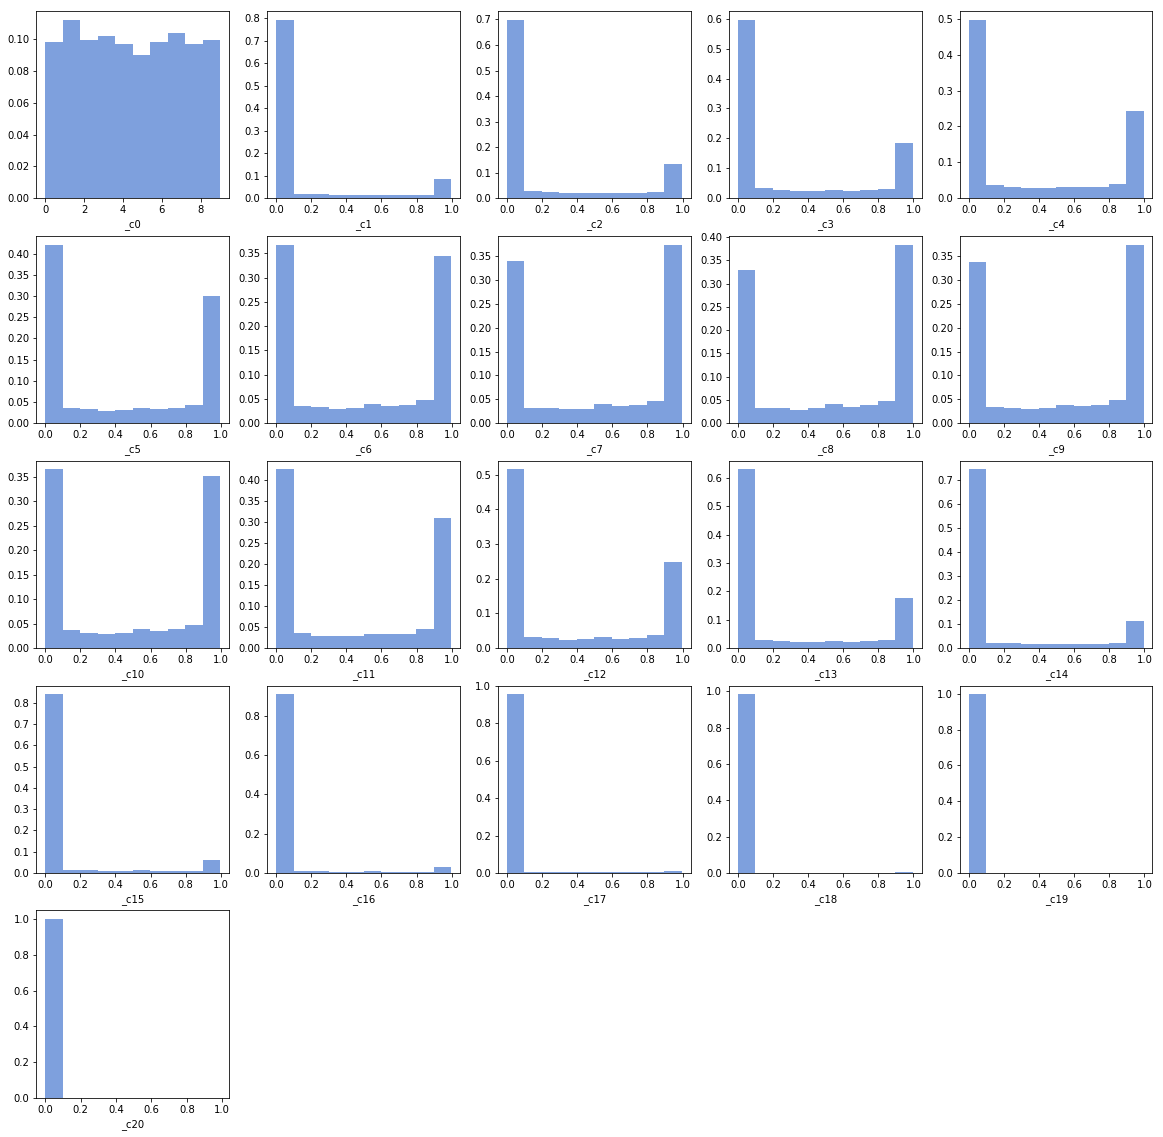

In [7]:
feature_baselines = mu.get_features(baseline_stats)
mu.show_distributions(feature_baselines)